In [13]:
import numpy as np
import pandas as pd
import os
import gc
from joblib import dump, load
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

## Configuration

In [3]:
# Path where the data is stored
SOURCE_PATH = '../../../data'
# Directory inside SOURCE_PATH where the derived data is stored
DERIVED_DATA_DIR = '/derived_data'
# Experiment params
DATE_EXPERIMENT = '24022021'

# Number of force cells in the robotic leg
N_CELLS = 8

# Experiment params
DATA_ID = '0002_31032021'

print('Model training with data: ' + DATA_ID)

Model training with data: 0002_31032021


## Load data

In [4]:
# Load data
X_train = np.load(os.path.join(SOURCE_PATH + DERIVED_DATA_DIR, DATE_EXPERIMENT, 'X_train_' + DATA_ID + '.npy'))
X_test = np.load(os.path.join(SOURCE_PATH + DERIVED_DATA_DIR, DATE_EXPERIMENT, 'X_test_' + DATA_ID + '.npy'))
Y_train = np.load(os.path.join(SOURCE_PATH + DERIVED_DATA_DIR, DATE_EXPERIMENT, 'Y_train_' + DATA_ID + '.npy'))
Y_test = np.load(os.path.join(SOURCE_PATH + DERIVED_DATA_DIR, DATE_EXPERIMENT, 'Y_test_' + DATA_ID + '.npy'))

print('X train: {}, Y train: {}'.format(X_train.shape, Y_train.shape))
print('X test: {}, Y test: {}'.format(X_test.shape, Y_test.shape))

X train: (187982, 15), Y train: (187982, 24)
X test: (80564, 15), Y test: (80564, 24)


In [5]:
# Load model
model = load(os.path.join(SOURCE_PATH + DERIVED_DATA_DIR, DATE_EXPERIMENT, 'model_' + DATA_ID + '.joblib'))

## Feature selection

In [11]:
H3_LEG = 'L' # L|R
features = [H3_LEG + a + m for a in ['Hip', 'Knee', 'Ankle'] for m in ['Pos', 'Vel', 'Acc', 'Torque']] + ['LegKnee{}Filtered'.format(m) for m in ['Position', 'Velocity', 'Torque']]

feature_importances = pd.DataFrame({'feature': features, 
                                    'importance': model.best_estimator_.feature_importances_}
                                  ).sort_values('importance', ascending=False)

feature_importances

,feature,importance
14,LegKneeTorqueFiltered,0.245472
0,LHipPos,0.148443
12,LegKneePositionFiltered,0.120479
13,LegKneeVelocityFiltered,0.073196
11,LAnkleTorque,0.060552
4,LKneePos,0.053116
7,LKneeTorque,0.049887
2,LHipAcc,0.048245
3,LHipTorque,0.037815
6,LKneeAcc,0.037010


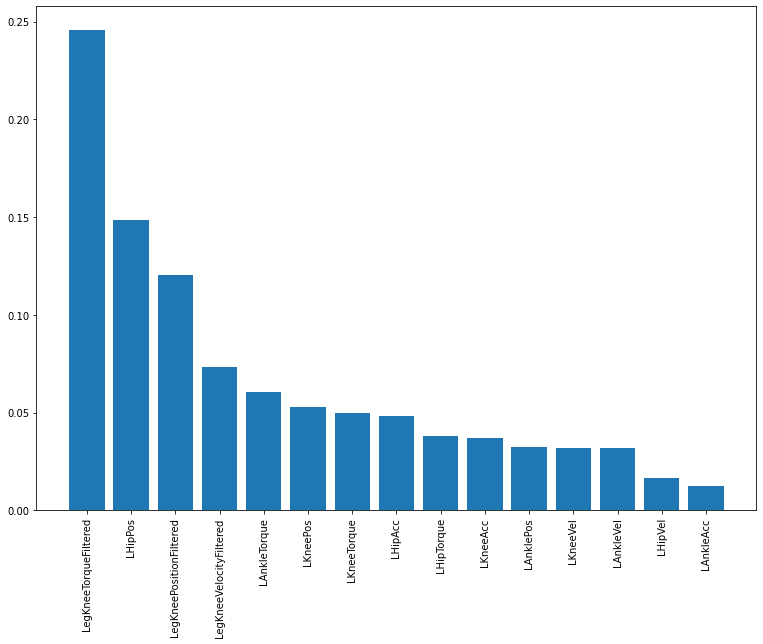

In [20]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_axes([0,0,1,1])
ax.bar(feature_importances['feature'], feature_importances['importance'])
plt.xticks(rotation=90)
plt.show()